In [166]:
import pandas as pd
from pickle import NONE
from re import T
import re
import pandas as pd
import json
import glob
import os 
import argparse
import logging
import numpy as np
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [167]:
# with open('results_summary_1.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

# ## change xlm-roberta to xlm_roberta
# keys_list = list(loaded_dict.keys())
# key_tobe_updated = []
# subkey_tobe_updated = []
# for key in keys_list:
#     for sub_key in loaded_dict[key]:
#         if sub_key == 'xlm-roberta':
#             key_tobe_updated.append(key)
#             #subkey_tobe_updated.append(sub_key)


# for key in key_tobe_updated:
#     loaded_dict[key]['xlm_roberta'] = loaded_dict[key]['xlm-roberta']
# for key in key_tobe_updated:
#     del loaded_dict[key]['xlm-roberta']

In [168]:
# data_df_list = []

# for data in loaded_dict.keys():
#      df_list = []
#      # print(' ')
#      # print(data)
#      for model in loaded_dict[data].keys():
#           df = pd.DataFrame.from_dict(loaded_dict[data][model], orient='index', columns=[model])
#           df = df.transpose()
#           df['model'] = model
#           df_list.append(df)
#      if len(df_list) == 0: print('THIS DATA NO MODEL', data)
#      result = pd.concat(df_list)
#      result['dataset'] = data
#      # new_row = pd.Series(pd.Series(), index=result.columns)
#      # result = result.append(new_row)

#      data_df_list.append(result)


# result = pd.concat(data_df_list)
# result.insert(0, 'model', result.pop('model'))
# result = result.set_index('dataset',drop=True).round(4)

# result.to_csv('summary.csv')

In [169]:
english_data_list = ['sst', 'agnews', 'multirc']
hindi_data_list = ['hindi_xnli', 'hindi_bbc_nli', 'hindi_bbc_topic']
chinese_data_list = ['ChnSentiCorp', 'csl', 'ant']  # chinese_xnli csl
spanish_data_list = ['spanish_csl', 'spanish_paws', 'spanish_xnli']
french_data_list = ['french_csl', 'french_paws', 'french_xnli']

all_data_list = english_data_list+chinese_data_list+spanish_data_list+french_data_list+hindi_data_list

FA_rep_dict={'Attention': '$\\alpha$', 'Scaled_Attention': '$\\alpha\\nabla\\alpha$', 'Gradients': '$x\\nabla x$', 'Integrated_Gradients': 'IG', 'Deeplift': 'DL'}

In [170]:
result = pd.read_csv('summary.csv', index_col='dataset')
result = result.loc[result.index.isin(all_data_list)] 
result

,model,Attention_Suff,Scaled_Attention_Suff,Gradients_Suff,Integrated_Gradients_Suff,Deeplift_Suff,Attention_Comp,Scaled_Attention_Comp,Gradients_Comp,Integrated_Gradients_Comp,Deeplift_Comp,F1,Accuracy
dataset,,,,,,,,,,,,,
sst,mbert,1.2063,1.2050,0.9991,1.3995,1.2594,1.2576,1.2643,1.0433,1.4835,1.3135,0.8627,0.8627
sst,xlm_roberta,1.0914,1.0976,1.0329,1.1125,1.0558,0.9242,0.9244,0.9537,1.0787,0.9878,0.8718,0.8719
sst,xlm_roberta_large,0.9555,0.9547,1.0189,0.7746,1.0062,0.9437,0.9382,1.1265,0.6697,1.0576,0.8116,0.8133
sst,bert,1.1740,1.1771,1.0207,1.1636,1.0726,1.5571,1.5597,1.1582,1.6837,1.1955,0.9156,0.9156
sst,roberta,1.2623,1.2693,1.3215,1.4922,1.1866,1.6021,1.6144,1.2723,1.4380,1.3409,0.8893,0.8898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
hindi_xnli,mbert,1.1363,1.1501,1.2088,1.3084,1.0710,1.0187,1.0159,1.0147,1.0359,0.9775,0.6754,0.6760
hindi_xnli,xlm_roberta,1.0099,0.9844,0.9850,1.0652,0.9954,1.1142,1.1161,1.0214,1.0578,1.0056,0.7235,0.7237
hindi_xnli,xlm_roberta_large,0.9875,0.9950,1.0806,0.9227,0.9470,1.0358,1.0309,1.1539,0.9326,0.9913,0.5792,0.6350


In [171]:
data_rep_dict = {'sst': 'SST', 'agnews': 'AG', 'multirc': 'MultiRC',
                 'ant': 'ANT', 'csl':'KR', 'ChnSentiCorp':'ChnSentiCorp',
                 'spanish_csl': 'CSL', 'spanish_paws': 'PAWS', 'spanish_xnli':'XNLI',
                 'french_csl': 'CSL', 'french_paws': 'PAWS', 'french_xnli':'XNLI',
                 'hindi_xnli': 'XNLI', 'hindi_bbc_nli':'NLI', 'hindi_bbc_topic':'Topic'
                 }

english_df = result[result.index.isin(english_data_list)]#.rename(index=data_rep_dict)
chinese_df = result[result.index.isin(chinese_data_list)]#.rename(index=data_rep_dict)
spanish_df = result[result.index.isin(spanish_data_list)]#.rename(index=data_rep_dict)
french_df = result[result.index.isin(french_data_list)]#.rename(index=data_rep_dict)
hindi_df = result[result.index.isin(hindi_data_list)]#.rename(index=data_rep_dict)

In [172]:
language_data_dict = {'English': english_data_list, 
                      'Hindi': hindi_data_list,
                      'Chinese': chinese_data_list,
                      'Spanish': spanish_data_list,
                      'French': french_data_list,
                      }
language_data_dict

{'English': ['sst', 'agnews', 'multirc'],
 'Hindi': ['hindi_xnli', 'hindi_bbc_nli', 'hindi_bbc_topic'],
 'Chinese': ['ChnSentiCorp', 'csl', 'ant'],
 'Spanish': ['spanish_csl', 'spanish_paws', 'spanish_xnli'],
 'French': ['french_csl', 'french_paws', 'french_xnli']}

In [173]:
def find_key_by_value(dictionary, value):
    for key, values in dictionary.items():
        if value in values: return key
    return None  # Return None if the value is not found in any list


In [174]:


def create_suff_plus_comp_count(df):
    attention = df['Attention_Suff'] + df['Attention_Comp']
    scaled_attention = df['Scaled_Attention_Suff'] + df['Scaled_Attention_Comp']
    IG = df['Integrated_Gradients_Suff'] + df['Integrated_Gradients_Comp']
    Gradients = df['Gradients_Suff'] + df['Gradients_Comp']
    Deeplift = df['Deeplift_Suff'] + df['Deeplift_Comp']

    new_df = pd.DataFrame({
                            'Attention': attention,
                           'Scaled_Attention': scaled_attention,
                           'Gradients': Gradients,
                           'Integrated_Gradients': IG,
                           'Deeplift': Deeplift,
                           })
    new_df = new_df.rename(columns=FA_rep_dict)
    new_df.columns.name='Feature Attribution'

    #new_df_count = new_df.groupby(new_df['Language']).sum()

    return new_df

In [175]:
Multi_Mono_dict = {"bert": "Monolingual", "roberta": "Monolingual", 
                   "hindi_bert": "Monolingual", "hindi_roberta": "Monolingual", 
                   "chinese_roberta": "Monolingual", "zhbert": "Monolingual" , "chinese_bert": "Monolingual", 
                   "spanish_roberta": "Monolingual", "BETO": "Monolingual",  
                   "french_bert": "Monolingual","french_roberta": "Monolingual",
                   
                   "mbert": "Multilingual", "xlm_roberta": "Multilingual", "xlm_roberta_large": "Multilingual", 
                   }
# assert len(Multi_Mono_dict.keys()) == result['model'].nunique()

In [176]:
FA_rep_dict={'Attention': '$\\alpha$', 'Scaled_Attention': '$\\alpha\\nabla\\alpha$', 'Gradients': '$x\\nabla x$', 'Integrated_Gradients': 'IG', 'Deeplift': 'DL'}
fa_list = ['Attention', 'Scaled_Attention', 'Gradients', 'Integrated_Gradients', 'Deeplift']

In [177]:
def get_diff_multi_mono(task_name, Suff_or_Comp, FA_name, bert_or_roberta = 'bert'):
    task_all = result.loc[task_name]
    col_name = f'{FA_name}_{Suff_or_Comp}'

    if bert_or_roberta == 'bert':
        multi_fa = task_all.loc[task_all['model'] == 'mbert', col_name].item()
        if 'spanish' in task_name: mono_fa = task_all.loc[task_all['model'] == 'BETO', col_name].item()
        else: 
            try: mono_fa = task_all.loc[task_all['model'].str.contains('_bert'), col_name].item()
            except: mono_fa = task_all.loc[task_all['model'] == 'bert', col_name].item()

    elif bert_or_roberta == 'roberta':
        multi_fa = task_all.loc[task_all['model'] == 'xlm_roberta', col_name].item()
        try: mono_fa = task_all.loc[task_all['model'].str.contains('_roberta') & ~task_all['model'].str.contains('xlm'), col_name].item()
        except: mono_fa = task_all.loc[task_all['model'] == 'roberta', col_name].item()

    elif bert_or_roberta == 'roberta_large':
        multi_fa = task_all.loc[task_all['model'] == 'xlm_roberta_large', col_name].item()
        # the same as roberta
        try: mono_fa = task_all.loc[task_all['model'].str.contains('_roberta') & ~task_all['model'].str.contains('xlm'), col_name].item() 
        except: mono_fa = task_all.loc[task_all['model'] == 'roberta', col_name].item()

    else: print(' choose bert or roberta')

    

    # if multi_fa < 1.000: multi_fa = 0.999
    # if mono_fa < 1.000: mono_fa = 0.999
    #if (multi_fa < 1.000) & (mono_fa < 1.000): diff = 0

    diff = multi_fa-mono_fa
    
    
    
    return multi_fa, mono_fa, diff

In [178]:
def get_sig_diff(list1, list2):
    p = stats.ttest_rel(list1, list2)
    p_value = p.pvalue
    diff = (sum(list1)-sum(list2))/len(list1)
    return diff, p_value

In [179]:
def all_in_one_func(Suff_or_Comp, Bert_or_RoBERTa):
    multi = []
    mono = []
    diff_tol = 0
    for task in all_data_list:
        for FA in fa_list:
            multi_fa, mono_fa, diff = get_diff_multi_mono(task, Suff_or_Comp, FA, bert_or_roberta = Bert_or_RoBERTa)
            multi.append(multi_fa)
            mono.append(mono_fa)
            diff_tol += diff

    total_diff, total_p = get_sig_diff(multi,mono)
    print('total data points: ', len(mono), 'total mean diff: ',diff_tol/len(mono), ' total_p: ', total_p)


    fa_lang_dict = {}
    for fa in fa_list:
        ONE_FA_LIST = []
        multi_one_fa = []
        mono_one_fa = []
        for lang_list in [english_data_list, chinese_data_list,spanish_data_list,french_data_list,hindi_data_list]: #
            multi_one_lang_one_fa = []
            mono_one_lang_one_fa = []
            diff_one_lang_one_fa = 0
            pvalue_over_fa_list = []
            for one_lang_task_list in lang_list:
                multi_one_lang_one_fa_one_task, mono_one_lang_one_fa_one_task, diff_one_lang_one_fa_one_task = get_diff_multi_mono(one_lang_task_list, Suff_or_Comp, fa, bert_or_roberta = Bert_or_RoBERTa)

                multi_one_lang_one_fa.append(multi_one_lang_one_fa_one_task) # over task
                mono_one_lang_one_fa.append(mono_one_lang_one_fa_one_task)

                multi_one_fa.append(multi_one_lang_one_fa_one_task)
                mono_one_fa.append(mono_one_lang_one_fa_one_task)

                diff_one_lang_one_fa += diff_one_lang_one_fa_one_task
                #diff_one_lang_one_fa += diff_one_lang_one_fa_one_task



            assert len(mono_one_lang_one_fa) == 3
            mean_diff_one_lang_one_fa = diff_one_lang_one_fa/len(mono_one_lang_one_fa) # for one cell
            ONE_FA_LIST.append(mean_diff_one_lang_one_fa)

        mean_diff_over_fa, pvalue_over_fa = get_sig_diff(multi_one_fa,mono_one_fa)
        fa_lang_dict[fa] = ONE_FA_LIST
        fa_lang_dict[fa].append(mean_diff_over_fa)
        fa_lang_dict[fa].append(pvalue_over_fa)


    df = pd.DataFrame(fa_lang_dict)
    df.index = ['English', 'Chinese', 'Spanish', 'French', 'Hindi', 'Avg Diff', 'P value']





    #### total diff and p value

    lang_diff_list = []
    lang_pvalue_list = []

    for lang_list in [english_data_list, chinese_data_list,spanish_data_list,french_data_list, hindi_data_list]: #,hindi_data_list
        
        multi_one_lang = []
        mono_one_lang = []
        for fa in fa_list: 
            multi_one_lang_one_fa = []
            mono_one_lang_one_fa = []
            diff_one_lang_one_fa = 0
            pvalue_over_fa_list = []
            for one_lang_task_list in lang_list:
                multi_one_lang_one_fa_one_task, mono_one_lang_one_fa_one_task, diff_one_lang_one_fa_one_task = get_diff_multi_mono(one_lang_task_list, Suff_or_Comp, fa, bert_or_roberta =Bert_or_RoBERTa)

                multi_one_lang_one_fa.append(multi_one_lang_one_fa_one_task) # over task
                mono_one_lang_one_fa.append(mono_one_lang_one_fa_one_task)

                multi_one_lang.append(multi_one_lang_one_fa_one_task)
                mono_one_lang.append(mono_one_lang_one_fa_one_task)

            mean_diff_one_lang_one_fa = diff_one_lang_one_fa/len(mono_one_lang_one_fa) # for one cell
            

        mean_diff_over_lang, pvalue_over_lang = get_sig_diff(multi_one_lang,mono_one_lang)
        lang_diff_list.append(mean_diff_over_lang)
        lang_pvalue_list.append(pvalue_over_lang)


    lang_diff_list.append(total_diff)
    lang_diff_list.append(None)
    lang_pvalue_list.append(None)
    lang_pvalue_list.append(total_p)

    df['Avg Diff'] = lang_diff_list
    df['P value'] = lang_pvalue_list
    df = df.rename(columns=FA_rep_dict)
    return df.round(3)

In [180]:
def df2mask(mono_df):
    mono_float_columns = mono_df.select_dtypes(include='float')
    mono_float_columns = mono_float_columns.loc[mono_float_columns.index.isin(all_data_list)] 

    mono_mask = mono_float_columns.drop(['F1', 'Accuracy'], axis=1).gt(1)
    mono_mask = mono_mask.loc[mono_mask.index.isin(all_data_list)] 


    Language_list = []
    for ind in mono_mask.index:
        Language_list.append(find_key_by_value(language_data_dict, ind))


    mono_mask['Language'] = Language_list       
    mono_count = mono_mask.groupby('Language').sum()
    mono_count = create_suff_plus_comp_count(mono_count)
    return mono_count




30 30


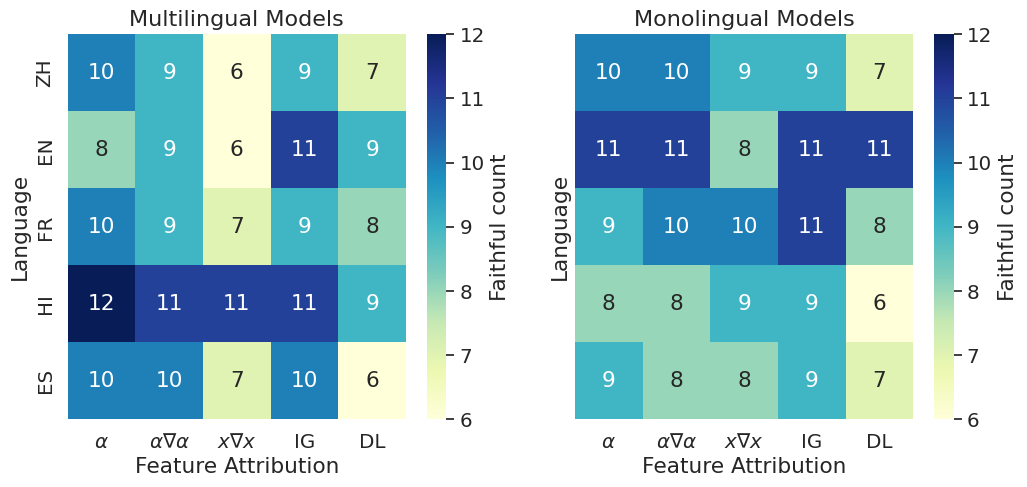

In [181]:
result2 = result.loc[result.index.isin(all_data_list)] 


multi_df = result2.loc[result2['model'].isin(['mbert', 'xlm_roberta'])] #, 'xlm_roberta_large'

mono_df = result2.loc[~result2['model'].isin(['mbert', 'xlm_roberta', 'xlm_roberta_large'])]
print(len(multi_df), len(mono_df))
multi_count = df2mask(multi_df)
mono_count = df2mask(mono_df).astype('int')
mono_count = mono_count.rename(index={'Chinese': 'ZH', 'English': 'EN', 'French':'FR', 'Hindi':'HI', 'Spanish':'ES'})
multi_count = multi_count.rename(index={'Chinese': 'ZH', 'English': 'EN', 'French':'FR', 'Hindi':'HI', 'Spanish':'ES'})

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=True, 
                                    width_ratios=None, height_ratios=None, subplot_kw=None, 
                                    gridspec_kw=None,figsize=(12,5))


sns.set(font_scale=1.3)

sns.heatmap(mono_count, annot=True, cbar_kws={'label': 'Faithful count'}, ax=ax2, cmap="YlGnBu",
            vmin=6, vmax=12) #.set(title='Multilingual Models')
ax2.set_title('Monolingual Models', fontsize=16)

sns.heatmap(multi_count, annot=True, ax=ax1, cbar_kws={'label': 'Faithful count'},cmap="YlGnBu",
            vmin=6, vmax=12) #.set(title='Multilingual Models')
ax1.set_title('Multilingual Models', fontsize=16)




plt.savefig("./scatterplot/count.png", dpi=400, format="png", bbox_inches="tight") 

In [182]:
all_in_one_func('Suff', 'roberta_large')

total data points:  75 total mean diff:  -0.18551999999999993  total_p:  3.0663363393439114e-07


,$\alpha$,$\alpha\nabla\alpha$,$x\nabla x$,IG,DL,Avg Diff,P value
English,-0.360,-0.354,-0.124,-0.445,-0.214,-0.300,0.001
Chinese,-0.143,-0.133,-0.042,-0.220,-0.044,-0.116,0.157
Spanish,-0.172,-0.240,-0.352,-0.278,-0.160,-0.240,0.001
French,-0.309,-0.314,-0.120,-0.248,-0.188,-0.236,0.000
Hindi,0.010,0.012,0.039,-0.239,0.001,-0.035,0.711
Avg Diff,-0.195,-0.206,-0.120,-0.286,-0.121,-0.186,NaN
P value,0.057,0.050,0.045,0.000,0.035,NaN,0.000


In [183]:
all_in_one_func('Comp', 'roberta_large')

total data points:  75 total mean diff:  -0.196924  total_p:  0.0006507117927958931


,$\alpha$,$\alpha\nabla\alpha$,$x\nabla x$,IG,DL,Avg Diff,P value
English,-0.201,-0.314,-0.366,0.078,-0.448,-0.250,0.204
Chinese,-0.266,-0.254,-0.047,-0.303,-0.048,-0.183,0.055
Spanish,-0.184,-0.102,-0.003,-0.029,-0.177,-0.099,0.060
French,-0.484,-0.484,-0.124,-0.627,-0.449,-0.434,0.005
Hindi,0.103,0.091,-0.022,-0.364,0.101,-0.018,0.868
Avg Diff,-0.206,-0.212,-0.112,-0.249,-0.204,-0.197,NaN
P value,0.147,0.119,0.088,0.169,0.088,NaN,0.001


In [184]:
all_in_one_func('Suff', 'bert')

total data points:  75 total mean diff:  0.07185733333333333  total_p:  0.004591821912692847


,$\alpha$,$\alpha\nabla\alpha$,$x\nabla x$,IG,DL,Avg Diff,P value
English,0.086,0.093,-0.024,0.187,0.048,0.078,0.292
Chinese,-0.018,-0.037,0.043,0.176,0.016,0.036,0.454
Spanish,0.200,0.202,0.006,0.190,0.015,0.123,0.049
French,0.184,0.173,-0.028,0.063,0.025,0.083,0.066
Hindi,-0.041,-0.035,0.010,0.266,-0.003,0.039,0.510
Avg Diff,0.082,0.079,0.001,0.176,0.020,0.072,NaN
P value,0.264,0.298,0.966,0.003,0.527,NaN,0.005


In [185]:
all_in_one_func('Comp', 'bert')

total data points:  75 total mean diff:  0.09973866666666666  total_p:  0.006577174500477619


,$\alpha$,$\alpha\nabla\alpha$,$x\nabla x$,IG,DL,Avg Diff,P value
English,0.122,0.106,0.075,0.078,0.015,0.079,0.323
Chinese,0.211,0.213,0.028,0.176,0.016,0.129,0.053
Spanish,0.268,0.268,0.040,0.160,0.105,0.168,0.048
French,0.294,0.299,0.046,0.217,0.156,0.202,0.049
Hindi,-0.232,-0.234,-0.128,0.138,0.057,-0.080,0.307
Avg Diff,0.133,0.130,0.012,0.154,0.070,0.100,NaN
P value,0.258,0.263,0.758,0.040,0.081,NaN,0.007


In [186]:
all_in_one_func('Suff', 'roberta')

total data points:  75 total mean diff:  -0.10023066666666668  total_p:  0.0064108363636240055


,$\alpha$,$\alpha\nabla\alpha$,$x\nabla x$,IG,DL,Avg Diff,P value
English,-0.082,-0.086,-0.097,-0.131,-0.319,-0.143,0.258
Chinese,0.065,0.056,-0.085,-0.040,-0.018,-0.005,0.946
Spanish,-0.070,-0.138,-0.336,-0.107,-0.111,-0.153,0.053
French,-0.206,-0.218,-0.133,-0.217,-0.188,-0.193,0.007
Hindi,-0.054,-0.047,0.045,-0.068,0.081,-0.009,0.888
Avg Diff,-0.070,-0.086,-0.121,-0.113,-0.111,-0.100,NaN
P value,0.535,0.462,0.041,0.033,0.076,NaN,0.006


In [187]:
all_in_one_func('Comp', 'roberta')

total data points:  75 total mean diff:  -0.22558400000000006  total_p:  4.5596833665157086e-07


,$\alpha$,$\alpha\nabla\alpha$,$x\nabla x$,IG,DL,Avg Diff,P value
English,-0.465,-0.436,-0.327,-0.333,-0.330,-0.378,0.000
Chinese,-0.230,-0.224,-0.111,-0.156,-0.062,-0.157,0.010
Spanish,-0.197,-0.116,-0.105,0.032,-0.218,-0.121,0.076
French,-0.486,-0.482,-0.232,-0.598,-0.475,-0.455,0.004
Hindi,0.071,0.062,-0.036,-0.268,0.082,-0.018,0.831
Avg Diff,-0.261,-0.239,-0.162,-0.265,-0.201,-0.226,NaN
P value,0.027,0.034,0.004,0.015,0.070,NaN,0.000
